# Series Temporales desde 0

Vamos a construir una serie temporal desde cero usando Python. Esta serie sintética de datos contendrá gran parte de los parámetros que suelen utilizarse para crear modelos que hagan predicciones en Series Temporales.

## Construcción de un rango temporal
Lo que tiene que tener toda serie temporal es una columna de tipo DateTime

In [1]:
import pandas as pd

inicio = pd.to_datetime('2020-01-01')
final = pd.to_datetime('2025-12-31')

# Construimos un rango completo de tiempo desde el inicio al final y con saltos iguales a la frecuencia...
rango_completo = pd.date_range(start=inicio, end=final, freq='D')

Tabla de las frecuencias más comunes que se pueden utilizar con `pd.date_range()`:

| Frecuencia | Descripción                   |
|------------|-------------------------------|
| D          | Diario                        |
| B          | Días laborales                |
| H          | Horario                       |
| T/min      | Minutos                       |
| S          | Segundos                      |
| L/ms       | Milisegundos                  |
| U/us       | Microsegundos                 |
| N          | Nanosegundos                  |
| W          | Semanal (inicio de semana)    |
| M          | Fin de mes                    |
| BM         | Fin de mes laboral            |
| MS         | Inicio de mes                 |
| BMS        | Inicio de mes laboral         |
| Q          | Trimestral (fin de trimestre) |
| BQ         | Trimestral laboral            |
| QS         | Inicio de trimestre           |
| BQS        | Inicio de trimestre laboral   |
| A          | Anual                         |
| BA         | Anual laboral                 |
| AS         | Inicio de año                 |
| BAS        | Inicio de año laboral         |


Se pueden utilizar otras frecuencias personalizadas si se necesita.

In [2]:
# Ejemplo de serie con otra frecuencia
rango_completo2 = pd.date_range(
    start=pd.to_datetime('2020-01-01'),
    end=pd.to_datetime('2024-01-01'),
    freq='W-MON')
# Podemos observar los puntos temporales generados
print(rango_completo2)

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',
               '2020-03-02', '2020-03-09',
               ...
               '2023-10-30', '2023-11-06', '2023-11-13', '2023-11-20',
               '2023-11-27', '2023-12-04', '2023-12-11', '2023-12-18',
               '2023-12-25', '2024-01-01'],
              dtype='datetime64[ns]', length=209, freq='W-MON')


### Intervalo personalizado

"Atajo" para construir un rango temporal frecuencia personalizada establecida como diferencia entre dos momentos de tiempo dados.

En este caso, 22 horas.

In [3]:
# Creo un intervalo por diferencia de dos medidas con 22 horas de diferencia
inicio_intervalo_frecuencia = pd.to_datetime('2020-01-01T23:00:00Z')
final_intervalo_frecuencia = pd.to_datetime('2020-01-02T21:00:00Z')

# O creación de un Timedelta
intervalo = pd.Timedelta("22H")

intervalo = final_intervalo_frecuencia - inicio_intervalo_frecuencia
rango_completo2 = pd.date_range(start=inicio, end=final, freq=intervalo)


In [4]:
# Podemos observar los puntos temporales generados
print(rango_completo2)
print("Intervalo entre los puntos:", intervalo)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 22:00:00',
               '2020-01-02 20:00:00', '2020-01-03 18:00:00',
               '2020-01-04 16:00:00', '2020-01-05 14:00:00',
               '2020-01-06 12:00:00', '2020-01-07 10:00:00',
               '2020-01-08 08:00:00', '2020-01-09 06:00:00',
               ...
               '2025-12-22 14:00:00', '2025-12-23 12:00:00',
               '2025-12-24 10:00:00', '2025-12-25 08:00:00',
               '2025-12-26 06:00:00', '2025-12-27 04:00:00',
               '2025-12-28 02:00:00', '2025-12-29 00:00:00',
               '2025-12-29 22:00:00', '2025-12-30 20:00:00'],
              dtype='datetime64[ns]', length=2391, freq='22H')
Intervalo entre los puntos: 0 days 22:00:00


Volvemos a la serie diaria original. Vemos los puntos temporales generados.

In [5]:
print(rango_completo)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', length=2192, freq='D')


### Intervalo calculado

In [6]:
"""def ajustar_periodicidad(dataframe):
    df_time_diffs = dataframe.index.to_series().diff().dt.total_seconds()
    frecuencia_moda = df_time_diffs.value_counts().index[0]
    dataframe = dataframe.asfreq(freq=(str(int(frecuencia_moda)))+ "S")
    return dataframe"""

'def ajustar_periodicidad(dataframe):\n    df_time_diffs = dataframe.index.to_series().diff().dt.total_seconds()\n    frecuencia_moda = df_time_diffs.value_counts().index[0]\n    dataframe = dataframe.asfreq(freq=(str(int(frecuencia_moda)))+ "S")\n    return dataframe'

In [7]:
#ajustar_periodicidad(serie_temporal_df)

## Serie temporal constante
La serie temporal más sencilla

In [8]:
serie = pd.DataFrame()
serie["Tiempo"] = rango_completo
serie["Inmutable"] = 100

In [9]:
serie.head()

,Tiempo,Inmutable
0,2020-01-01,100
1,2020-01-02,100
2,2020-01-03,100
3,2020-01-04,100
4,2020-01-05,100


In [10]:
serie.dtypes

Tiempo       datetime64[ns]
Inmutable             int64
dtype: object

In [11]:
serie = serie.set_index('Tiempo')
# serie = serie.asfreq(rango_completo.freq)
# serie = serie.sort_index()

In [12]:
serie.head()

,Inmutable
Tiempo,
2020-01-01,100
2020-01-02,100
2020-01-03,100
2020-01-04,100
2020-01-05,100


In [13]:
serie.dtypes

Inmutable    int64
dtype: object

### Gráfico de serie temporal constante.

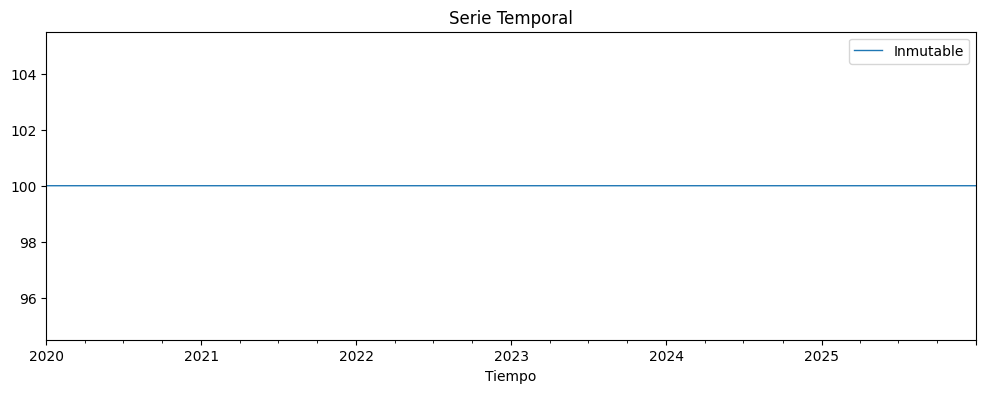

In [14]:
# Gráfico serie temporal
# ==============================================================================
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
ax.set_title('Serie Temporal')
ax.legend();

## Serie temporal cíclica

Introducimos un término cíclico al cual podemos ajustar el periodo de repetición del ciclo

In [15]:
serie["Indice"] = range(0,len(rango_completo))
#serie["Indice"] = serie["Indice"].astype(float)
import numpy as np
periodo_anual = (pd.Timedelta('365 days')/rango_completo.freq)/(2*np.pi)
#periodo_mensual = (pd.Timedelta('365 days')/rango_completo.freq)/(24*np.pi)
#periodo_semanal = (pd.Timedelta('7 days')/rango_completo.freq)/(2*np.pi)
#periodo_diario = (pd.Timedelta('1 days')/rango_completo.freq)/(2*np.pi)

Elegimos el periodo y creamos la columna con el término cíclico

In [16]:
periodo_elegido = periodo_anual
serie["Ciclico"] = np.sin(serie["Indice"]/periodo_elegido)

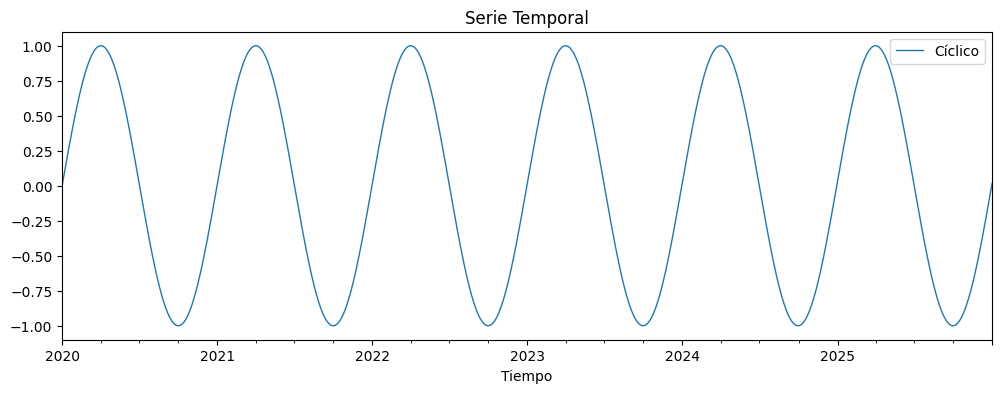

In [17]:
# Gráfico serie temporal
# ==============================================================================
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
# serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
serie["Ciclico"].plot(ax=ax, label='Cíclico', linewidth=1)
ax.set_title('Serie Temporal')
ax.legend();

## Término de tendencia

La siguiente celda añade una tendencia. Es una recta que va de 0 a 1 y que añadiremos a la columna tendencia.

Si la sumamos multiplicada por 80, sirve para que nuestra serie temporal sea ascendente en 80 unidades al final de la serie. Si queremos que sea descendente, la restamos.

In [18]:
serie["Tendencia"] = np.linspace(0, 1, num = len(rango_completo))

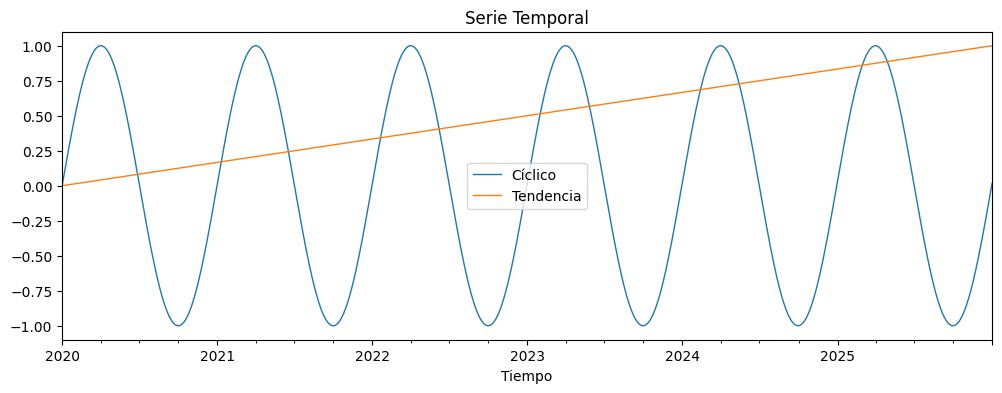

In [19]:
# Gráfico serie temporal
# ==============================================================================
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
# serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
serie["Ciclico"].plot(ax=ax, label='Cíclico', linewidth=1)
serie["Tendencia"].plot(ax=ax, label='Tendencia', linewidth=1)
ax.set_title('Serie Temporal')
ax.legend();

## Término parabólico

Usando la recta de tendencia añadimos un término que suba de manera acelerada a lo largo del tiempo.

Ajustamos el término para que vaya de 0 a 1.

Al multiplicarlo por una constante haremos que este término tenga más o menos influencia sobre el valor final de la serie temporal.

In [20]:
serie["Parabola"] = np.linspace(0, 1, num = len(rango_completo))*np.linspace(0, 1, num = len(rango_completo))

In [21]:
print(serie["Parabola"].tolist()[-5:])

[0.9963520322234377, 0.9972633992302022, 0.998175182861884, 0.9990873831184833, 1.0]


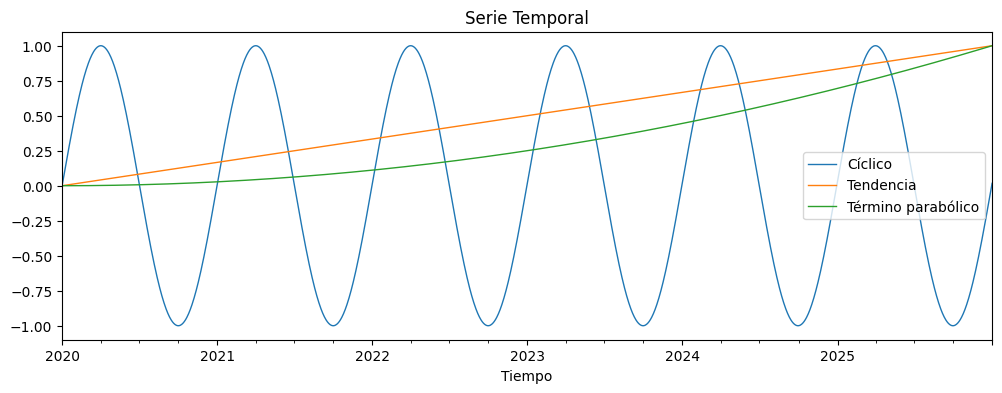

In [22]:
# Gráfico serie temporal
# ==============================================================================
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
# serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
serie["Ciclico"].plot(ax=ax, label='Cíclico', linewidth=1)
serie["Tendencia"].plot(ax=ax, label='Tendencia', linewidth=1)
serie["Parabola"].plot(ax=ax, label='Término parabólico', linewidth=1)
ax.set_title('Serie Temporal')
ax.legend();

## Término de ruido blanco.

Es un término que simulará variaciones aleatorias normales.

El multiplicar este ruido por una constante haremos que la variación aleatoria tenga más o menos importancia respecto al resto de valores de la serie.

In [23]:
random_values = np.random.normal(loc=0, scale=1, size=len(rango_completo))
serie["Ruido"] = random_values

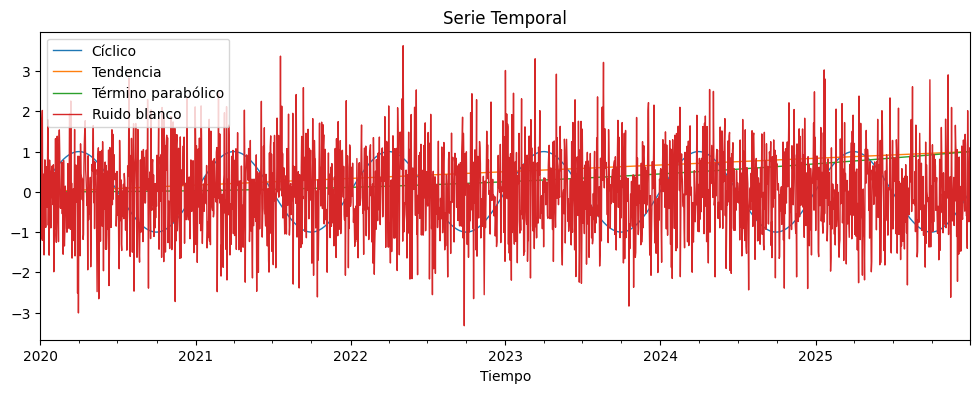

In [24]:
# Gráfico serie temporal
# ==============================================================================
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
# serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
serie["Ciclico"].plot(ax=ax, label='Cíclico', linewidth=1)
serie["Tendencia"].plot(ax=ax, label='Tendencia', linewidth=1)
serie["Parabola"].plot(ax=ax, label='Término parabólico', linewidth=1)
serie["Ruido"].plot(ax=ax, label='Ruido blanco', linewidth=1)
ax.set_title('Serie Temporal')
ax.legend();

# Creamos "Valor". El dato temporal a estudiar.


Ejemplo para una amplitud estacional de 30 (componente cíclico), una tendencia del 10%, una parábola descendente hasta el 5% y un ruido del 12% (Tened en cuenta que la base de "Inmutable" se ha establecido en 100)
```
serie["Valor"] = serie["Inmutable"] + 30*serie["Ciclico"] + 10*serie["Tendencia"] - 5*serie["Parabola"] + 12*serie["Ruido"]
```



In [25]:
serie["Valor"] = serie["Inmutable"] + 30*serie["Ciclico"] - 10*serie["Tendencia"] + 5*serie["Parabola"] + 3*serie["Ruido"]

## Gráfico serie temporal

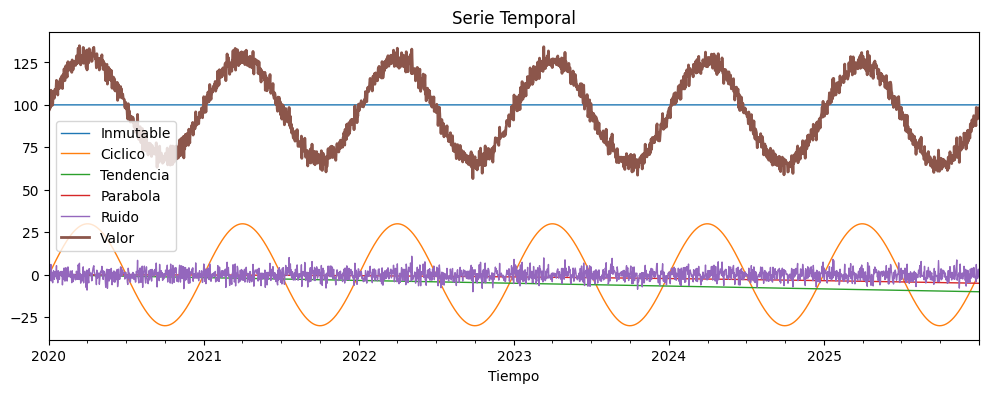

In [26]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
serie["Inmutable"].plot(ax=ax, label='Inmutable', linewidth=1)
(serie["Ciclico"]*30).plot(ax=ax, label='Ciclico', linewidth=1)
(serie["Tendencia"]*(-10)).plot(ax=ax, label='Tendencia', linewidth=1)
(serie["Parabola"]*(-5)).plot(ax=ax, label='Parabola', linewidth=1)
(serie["Ruido"]*3).plot(ax=ax, label='Ruido', linewidth=1)
serie["Valor"].plot(ax=ax, label='Valor', linewidth=2)
ax.set_title('Serie Temporal')
ax.legend();

## Estacionariedad

Realizamos un estudio inicial de la estacinariedad de la serie temporal.



### Prueba de Dickey-Fuller aumentada (ADF)

**H0: No estacionaria (raiz unitaria)**

La prueba de Dickey-Fuller aumentada es una prueba estadística común utilizada para evaluar la estacionariedad de una serie de tiempo. Esta prueba compara los estadísticos de la serie con los valores críticos para determinar si la serie tiene una raíz unitaria (no estacionaria) o no.

In [27]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller aumentada
result = adfuller(serie["Valor"])

# Extraer y mostrar los resultados
print('Estadística de prueba:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Estadística de prueba: -5.959074553550253
Valor p: 2.059608536270257e-07
Valores críticos:
	1%: -3.4333740509447717
	5%: -2.8628759187993382
	10%: -2.567481176655697


Si el valor p es menor que un umbral específico (por ejemplo, 0.05), se puede rechazar la hipótesis nula de que la serie tiene una raíz unitaria y considerarla estacionaria.

Un valor p mayor que 0.05 indica que no hay suficiente evidencia estadística para rechazar la hipótesis nula de no estacionariedad. Sin embargo, no significa necesariamente que la serie sea no estacionaria. Podría existir una leve ambigüedad y podría ser necesario realizar un análisis adicional para llegar a una conclusión más sólida.

p<0.05 -> Estacionaria<br>
p>0.05 -> Vete a saber

En nuestra serie temporal artificial, basta con que demos un valor mínimo a la recta de tendencia para que este ensayo de valores de p altos.

Es lógico ya que la tendencia significa "no estacionaria", es decir, que no regresa como un muelle al valor de reposo inicial.

Lo mismo ocurrirá con la parábola.

Sin embargo, al introducir ruido blanco podemos hacer "confundirse" al ensayo.

### Prueba de KPSS

**H0: Estacionaria (no tiene raíz unitaria)**

La prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS) es otra prueba estadística utilizada para evaluar la estacionariedad de una serie de tiempo. Esta prueba compara la varianza estimada de la serie con la varianza bajo la hipótesis nula de estacionariedad.


In [28]:
from statsmodels.tsa.stattools import kpss

# Realizar la prueba de KPSS
result = kpss(serie["Valor"])

# Extraer y mostrar los resultados
print('Estadística de prueba:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[3].items():
    print('\t{}: {}'.format(key, value))


Estadística de prueba: 0.3058472371488446
Valor p: 0.1
Valores críticos:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-28-d7c8045e26ad>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(serie["Valor"])


En la prueba KPSS, la hipótesis nula establece que la serie de tiempo es estacionaria o tiene una tendencia lineal constante. Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que la serie es no estacionaria.

Un valor p mayor que el umbral comúnmente utilizado de 0.05 indica que no hay suficiente evidencia estadística para rechazar la hipótesis nula de estacionariedad.

Sin embargo, no se puede concluir de manera definitiva que la serie es estacionaria.

p<0.05 -> No estacionaria<br>
p>0.05 -> Vete a saber

En nuestra función prefabricada no es capaz de detectar no estacionalidad con estos parámetros:


```
serie["Valor"] = serie["Inmutable"] + 30*serie["Ciclico"] - 10*serie["Tendencia"] + 5*serie["Parabola"] + 3*serie["Ruido"]
```



### Prueba de Phillips-Perron (PP)

**H0: No estacionaria (raiz unitaria)**

La prueba PP (Phillips-Perron) es una prueba estadística utilizada para evaluar la estacionariedad de una serie temporal. Es una variante de la prueba de Dickey-Fuller aumentada (ADF) y también se basa en la presencia de una raíz unitaria en la serie.

La prueba PP se utiliza para detectar la presencia de una tendencia determinística en la serie de tiempo. Evalúa la hipótesis nula de que la serie tiene una raíz unitaria (no estacionaria) frente a la hipótesis alternativa de que la serie es estacionaria alrededor de una tendencia lineal.

A diferencia de la prueba ADF, la prueba PP permite la inclusión de términos adicionales en el modelo de regresión, como una constante y/o una tendencia determinística. Estos términos adicionales ayudan a capturar diferentes tipos de tendencias que pueden estar presentes en la serie de tiempo.

In [29]:
try:
    import arch
    print("module 'arch' is installed")
except ModuleNotFoundError:
    print("module 'arch' is not installed")
    !pip install arch

module 'arch' is not installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 5.1 MB/s eta 0:00:00


In [30]:
from arch.unitroot import PhillipsPerron as pprtest

# Realizar la prueba PP
result = pprtest(serie["Valor"])

# Realizar la prueba PP
#result = pp.test()

# Extraer y mostrar los resultados
print('Estadística de prueba:', result.stat)
print('Valor p:', result.pvalue)
print('Valores críticos:')
for key, value in result.critical_values.items():
    print('\t{}: {}'.format(key, value))


Estadística de prueba: -3.3481135942133404
Valor p: 0.012860084918639693
Valores críticos:
	1%: -3.433338123180619
	5%: -2.862860055130884
	10%: -2.567472730288902


Al igual que con ADF:

p<0.05 -> Estacionaria<br>
p>0.05 -> Vete a saber

La prueba de Phillips Perron tiene más "manga ancha" para considerar estacionaria una serie temporal. Sólo debe realizarse si KPSS no ha detectado que es no estacionaria.

Con estos parámetros, la serie se considera como estacionaria. La analizaré así en el modelo AutoregForecaster

```
serie["Valor"] = serie["Inmutable"] + 30*serie["Ciclico"] - 10*serie["Tendencia"] + 5*serie["Parabola"] + 3*serie["Ruido"]
```



### Dickey-Fuller Generalized Least Squares

**H0: No estacionaria (raiz unitaria)**

La prueba DF-GLS es una variante de la prueba de Dickey-Fuller (ADF) que permite tener en cuenta la posible presencia de correlación serial en los residuos al estimar el modelo. Esta prueba es especialmente útil cuando hay presencia de autocorrelación en los residuos, lo que puede ocurrir en algunos casos de series de tiempo.

In [31]:
from arch.unitroot import DFGLS

# Crear una instancia de la prueba DF-GLS
dfgls = DFGLS(serie["Valor"], lags=10)

# Extraer y mostrar los resultados
print('Estadística de prueba:', dfgls.stat)
print('Valor p:', dfgls.pvalue)
print('Valores críticos:')
for key, value in dfgls.critical_values.items():
    print('\t{}: {}'.format(key, value))

Estadística de prueba: -1.5862424936247437
Valor p: 0.11005545584098242
Valores críticos:
	1%: -2.577205427259003
	5%: -1.9535407083001868
	10%: -1.6305892380522156


Al igual que con ADF:

p<0.05 -> Estacionaria<br>
p>0.05 -> Vete a saber

Sólo realizarla si las anteriores han sido "ambiguas"

## Gráficos de autocorrelación


Un gráfico de autocorrelación muestra en el eje horizontal los retrasos o lags, que representan los períodos anteriores en la serie de tiempo con los que se está calculando la correlación. En el eje vertical se muestra el valor de la correlación, que varía entre -1 y 1.

Al analizar un gráfico de autocorrelación, se pueden obtener varias informaciones importantes:

1. Autocorrelación: El gráfico muestra el nivel de correlación entre los valores pasados de la serie de tiempo y los valores actuales en diferentes retrasos. Se puede observar si existe autocorrelación positiva o negativa, lo cual indica una dependencia lineal entre los valores pasados y presentes.

2. Patrones de temporada: Si la serie de tiempo exhibe un patrón estacional, es decir, si los valores se repiten en períodos regulares, el gráfico de autocorrelación mostrará picos significativos en los retrasos correspondientes a los múltiplos de la longitud de la estacionalidad. Estos picos indican la presencia de autocorrelación en esos retrasos específicos, lo cual sugiere un patrón estacional en los datos.

3. Significancia estadística: Junto al gráfico de autocorrelación, a menudo se muestra una banda sombreada o líneas horizontales para indicar los límites de confianza estadística. Si los coeficientes de autocorrelación se encuentran fuera de estos límites, se consideran estadísticamente significativos y sugieren una correlación real en esos retrasos.

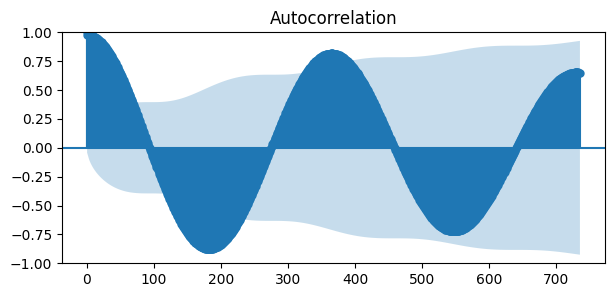

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(serie['Valor'], ax=ax, lags=735)
plt.show()

Aquí podemos ver alta correlación en intervalos anuales

**Gráfico autocorrelación parcial**

El gráfico de autocorrelación parcial (PACF por sus siglas en inglés) sirve para analizar la autocorrelación parcial en una serie de tiempo. La autocorrelación parcial mide la correlación entre los valores pasados de la serie de tiempo y los valores actuales, **eliminando la influencia de los valores intermedios.**

Un gráfico de autocorrelación parcial muestra en el eje horizontal los retrasos o lags, que representan los períodos anteriores en la serie de tiempo con los que se está calculando la correlación parcial. En el eje vertical se muestra el valor de la correlación parcial, que también varía entre -1 y 1.

Al analizar un gráfico de autocorrelación parcial, se pueden obtener varias informaciones importantes:

1. Autocorrelación parcial: El gráfico muestra el nivel de correlación parcial entre los valores pasados de la serie de tiempo y los valores actuales en diferentes retrasos, eliminando la influencia de los valores intermedios. La autocorrelación parcial proporciona una medida más precisa de la correlación directa entre los valores pasados y presentes.

2. Identificación de órdenes de modelos AR: Los gráficos de autocorrelación parcial se utilizan comúnmente para identificar los órdenes de modelos autorregresivos (AR). Los picos significativos en los retrasos indican los órdenes AR correspondientes. Por ejemplo, si hay un pico significativo en el retraso 1 y ningún otro pico significativo después de ese, sugiere un posible modelo AR(1).

3. Significancia estadística: Al igual que en el gráfico de autocorrelación, se pueden mostrar límites de confianza estadística en el gráfico de autocorrelación parcial. Los picos que exceden estos límites se consideran estadísticamente significativos y sugieren una correlación parcial real en esos retrasos.

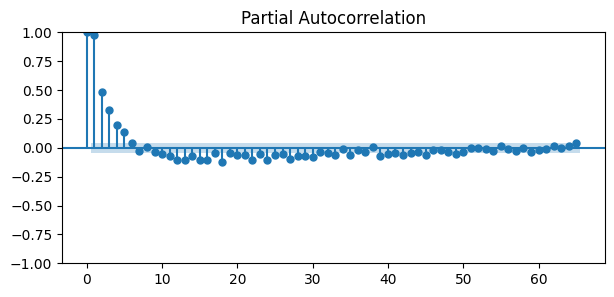

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(serie["Valor"], ax=ax, lags=65)
plt.show()

## Separación Train, Validación y Test
Además, para poder optimizar los hiperparámetros del modelo y evaluar su capacidad predictiva, se dividen los datos en 3 conjuntos, uno de entrenamiento, otro de validación y otro de test.

In [34]:
final = serie.index.max()
inicio = serie.index.min()
fin_train = inicio + 5*pd.Timedelta('365 days')
fin_validacion = fin_train + pd.Timedelta('336 days')
print(inicio, fin_train, fin_validacion, final)

2020-01-01 00:00:00 2024-12-30 00:00:00 2025-12-01 00:00:00 2025-12-31 00:00:00


In [35]:
# Separación datos train-val-test
# ==============================================================================
datos_train = serie.loc[: fin_train, :]
datos_val   = serie.loc[fin_train:fin_validacion, :]
datos_test  = serie.loc[fin_validacion:, :]

print(f"Fechas train      : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

Fechas train      : 2020-01-01 00:00:00 --- 2024-12-30 00:00:00  (n=1826)
Fechas validacion : 2024-12-30 00:00:00 --- 2025-12-01 00:00:00  (n=337)
Fechas test       : 2025-12-01 00:00:00 --- 2025-12-31 00:00:00  (n=31)


De esta manera:
- Entreno con los datos de 2020, 2021, 2022 y 2023
- Valido el entrenamiento con los datos de 2024 hasta el 30 de Diciembre
- Uso el modelo para predecir Enero de 2024

## Modelo autoregresivo recursivo

ForecasterAutoreg: Es un modelo basado en **regresión autorregresiva** que utiliza características de retraso (lags) de la variable de interés para predecir su valor futuro. Este enfoque se utiliza cuando se considera que el comportamiento pasado de la serie temporal es una buena indicación de su comportamiento futuro. Algunas situaciones en las que podrías usar ForecasterAutoreg incluyen:

- La serie temporal muestra patrones claros de dependencia en los valores pasados.
- No hay evidencia de estacionalidad o tendencia en la serie temporal.
- Se dispone de características adicionales (exógenas) que pueden ayudar a mejorar las predicciones.

**ForecasterAutoreg es especialmente útil cuando se tienen múltiples series temporales y se desea predecir cada una de ellas individualmente.**

En este caso, crea y entrena un modelo autorregresivo recursivo (ForecasterAutoreg) a partir de un modelo de regresión lineal con penalización Ridge y una ventana temporal de 365 lags. Esto último significa que, para cada predicción, se utilizan como predictores la demanda de las 365 días anteriores.

In [36]:
try:
    import skforecast
    print("module 'skforecast' is installed")
except ModuleNotFoundError:
    print("module 'skforecast' is not installed")
    !pip install skforecast

module 'skforecast' is not installed
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.4 MB/s eta 0:00:00


### Crear y entrenar Forecaster

Utilizo un regresor al que le pido que agrupe los datos en grupos de 365 lags (1 año)

In [37]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

forecaster = ForecasterAutoreg(
                regressor     = Ridge(),
                lags          = 365,
                transformer_y = StandardScaler()
             )

forecaster.fit(y=serie.loc[:fin_validacion, 'Valor'])
forecaster

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: Ridge() 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 2

### Predicción (backtest)

A este tipo de evaluación se le conoce como backtesting, y puede aplicarse fácilmente con la función backtesting_forecaster(). Esta función devuelve, además de las predicciones, una métrica de error.

In [47]:
serie.index.freq = 'D'  # Establece la frecuencia diaria, ajusta esto según la frecuencia de tus datos

In [48]:
from skforecast.model_selection import backtesting_forecaster
metrica, predicciones = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = serie["Valor"],
                            initial_train_size = len(serie.loc[:fin_validacion]),
                            fixed_train_size   = False,
                            steps      = 365,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = True)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 2162
Number of observations used for backtesting: 30
    Number of folds: 1
    Number of steps per fold: 365
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 30 observations.

Fold: 0
    Training:   2020-01-01 00:00:00 -- 2025-12-01 00:00:00  (n=2162)
    Validation: 2025-12-02 00:00:00 -- 2025-12-31 00:00:00  (n=30)



  0%|          | 0/1 [00:00<?, ?it/s]

### Representación gráfica de la predicción

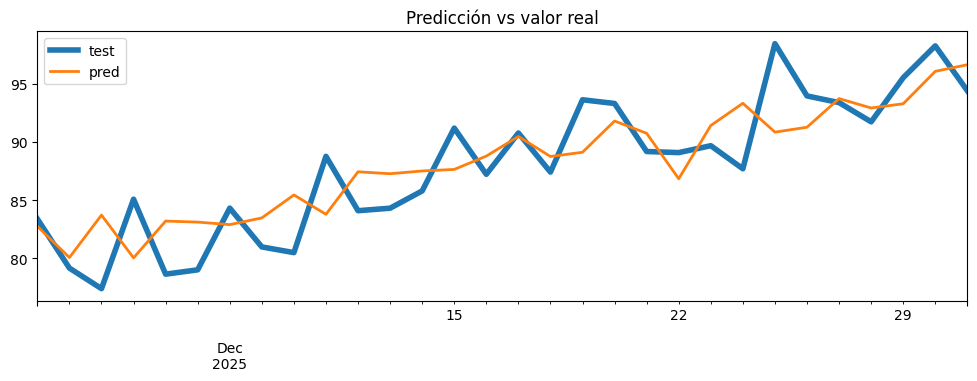

In [49]:
fig, ax = plt.subplots(figsize=(12, 3.5))
serie.loc[predicciones.index, 'Valor'].plot(ax=ax, linewidth=4, label='test')
predicciones.plot(linewidth=2, label='predicción', ax=ax)
ax.set_title('Predicción vs valor real')
ax.legend();

In [50]:
print(f'Error backtest: {metrica}')

Error backtest: 2.867791322441186


## Modelo ARIMA

ARIMA (Autoregressive Integrated Moving Average): Es un modelo estadístico que combina componentes autoregresivos y de media móvil para modelar y predecir series temporales. **ARIMA se utiliza cuando se sospecha que la serie temporal tiene tendencia y/o estacionalidad** y se necesita una modelización más sofisticada para capturar estos patrones. Algunas situaciones en las que podrías usar ARIMA incluyen:

La serie temporal muestra una tendencia clara, es decir, **un cambio sistemático en el tiempo**.
Hay patrones estacionales en la serie, como ciclos repetitivos a lo largo del tiempo.
La serie temporal presenta comportamientos no lineales que no pueden ser capturados por un modelo autoregresivo simple.
ARIMA es un modelo más general y flexible que ForecasterAutoreg, pero puede ser más complejo de ajustar y requiere más datos para estimar adecuadamente los parámetros del modelo.

- AR = Autorregresivo (nuestro componente cíclico)
- MA = Moving Average = Media Móvil (nuestro componente de tendencia)
- I = Integrado (nuestro componente parabólico)
  - El componente de tendencia lo eliminamos mediante diferenciación (derivada) para que la serie quede "horizontal".
  - El componente de parábola por una doble diferenciación. (derivada de la derivada) para que la serie quede "horizontal".

Por tanto, la caracterización de la serie se convierte en encontrar los parámetros de estos 3 fenómenos.
- p = orden del término AR
- q = orden del término MA
- d = Número de diferenciaciones necesarias para "aplanar la curva"...

Nuestro objetivo es hacer las modificaciones que hagan falta para que la serie se convierta en estacionaria. Empezamos con las diferenciaciones, derivando la serie el número mínimo de veces hasta que sea estacionaria *(obviamente, si ya era estacionaria, habríamos usado el Modelo Autorregresivo Recursivo anterior)*

### Orden de diferenciación "d"

Usamos la serie creada con esta combinación de componentes:

```
serie["Valor"] = serie["Inmutable"] + 30*serie["Ciclico"] + 30*serie["Tendencia"] + 25*serie["Parabola"] + 5*serie["Ruido"]
```
Que da para la prueba ADF un p>0.05 y para KPSS un p<0.01. Por tanto es NO ESTACIONARIA


In [51]:
serie["Valor"] = serie["Inmutable"] + 10*serie["Ciclico"] + 50*serie["Tendencia"] + 125*serie["Parabola"] + 5*serie["Ruido"]
serie_copia = serie[:]
serie = serie[:"2024-07-16"]

In [53]:
serie.head()

,Inmutable,Indice,Ciclico,Tendencia,Parabola,Ruido,Valor
Tiempo,,,,,,,
2020-01-01,100,0,0.000000,0.000000,0.000000e+00,-0.105729,99.471356
2020-01-02,100,1,0.017213,0.000456,2.083125e-07,-1.206328,94.163341
2020-01-03,100,2,0.034422,0.000913,8.332498e-07,0.667368,103.726801
2020-01-04,100,3,0.051620,0.001369,1.874812e-06,-1.160057,94.784606
2020-01-05,100,4,0.068802,0.001826,3.332999e-06,1.761005,109.584749


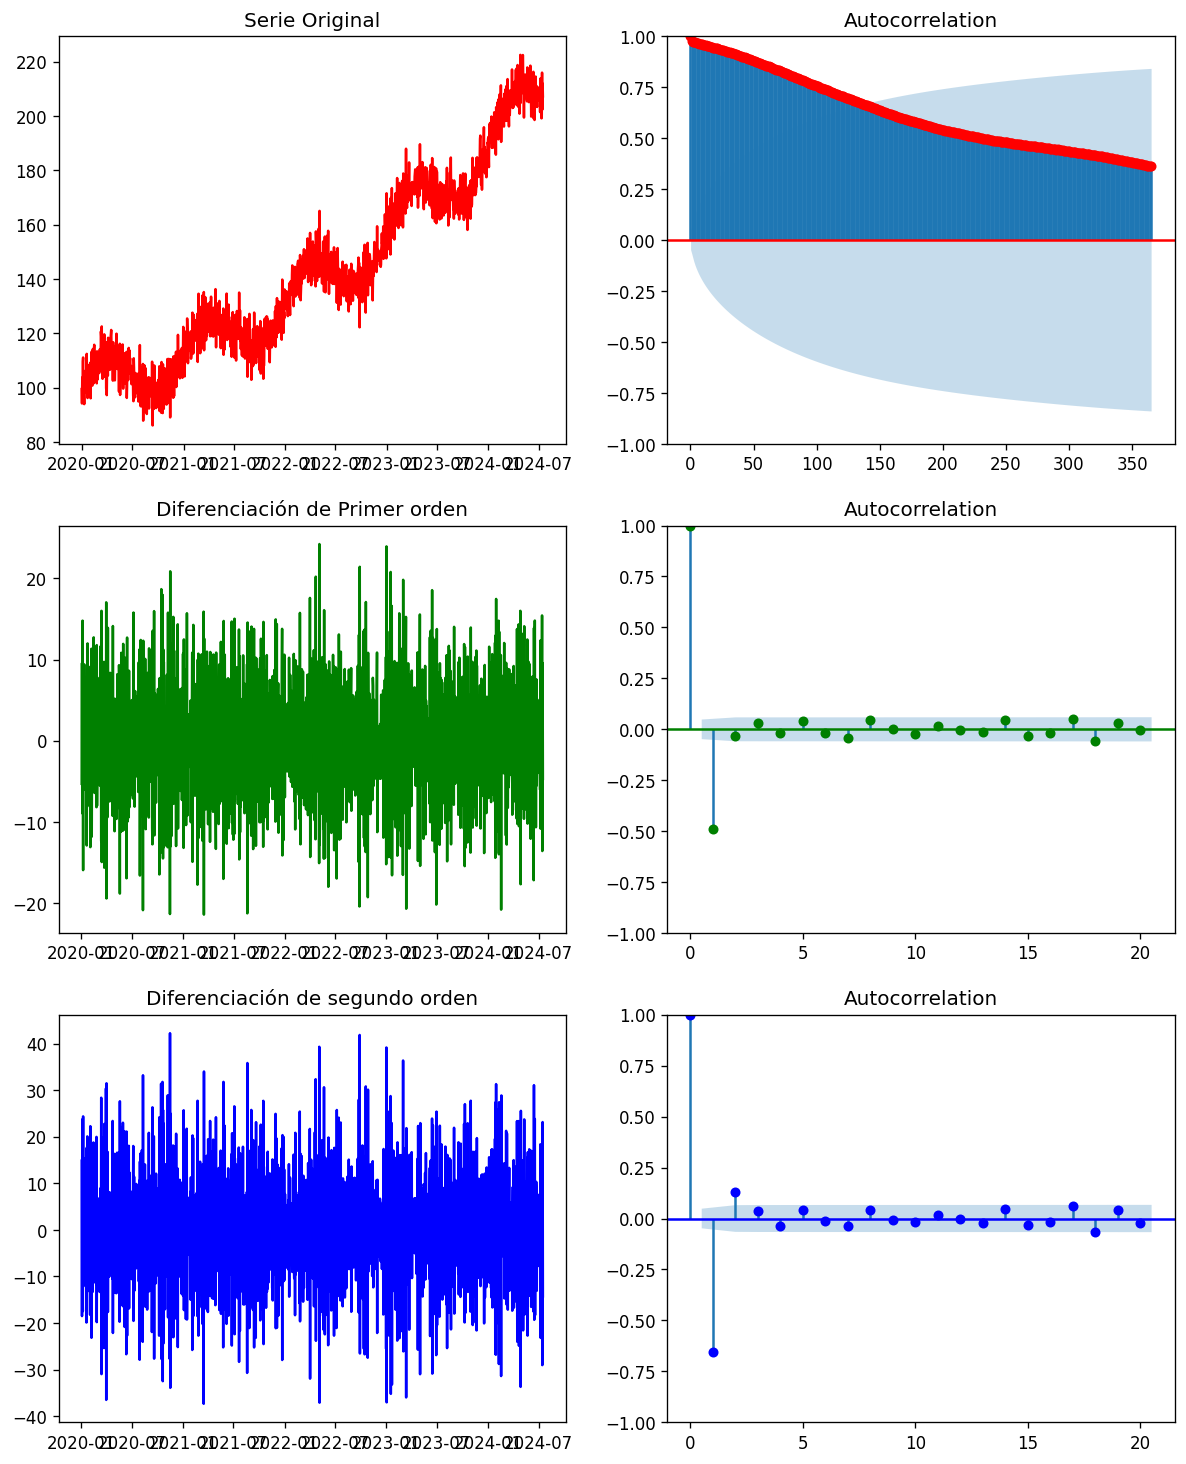

In [54]:
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12,15), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=False)

# Serie Original
axes[0, 0].plot(serie["Valor"], color="r"); axes [0, 0].set_title('Serie Original')
plot_acf(serie["Valor"], ax=axes[0, 1], color="r", lags=365)

# Primera diferenciación
axes[1, 0].plot(serie["Valor"].diff(), color="g"); axes[1, 0].set_title("Diferenciación de Primer orden")
plot_acf(serie["Valor"].diff().dropna(), ax=axes[1, 1], color="g", lags=20)

# 2nd Difernciacion
axes [2, 0].plot(serie["Valor"].diff().diff(), color="b"); axes [2, 0].set_title("Diferenciación de segundo orden")
plot_acf(serie["Valor"].diff().diff().dropna(), ax=axes[2, 1], color="b", lags=20)

plt.show()

Ya con la primera diferenciación se ve que se ha eliminado la tendencia

Además en la segunda diferenciación se ven un pico positivo en 2 que sugiere que puede haber habido sobrediferenciación.

La componente parabólica tiene poca importancia.

Para comprobar la estacionariedad de la diferenciada calculamos ADF


In [55]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller aumentada
result = adfuller(serie["Valor"].diff().dropna())

# Extraer y mostrar los resultados
print('Estadística de prueba:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Estadística de prueba: -18.1369878275232
Valor p: 2.4969301042477773e-30
Valores críticos:
	1%: -3.434331479397839
	5%: -2.863298594928142
	10%: -2.567706235622361


Ya que ADF da $p=8.22·10^{-5} <0.05$ -> Es estacionaria

Por tanto el valor "d" es 1 ya que basta una diferenciación para hacerla estacionaria



### Orden del término MA "q"
El orden q es el numero de puntos que sobresalen en el gráfico de Autocorrelación (excluyendo el 0)

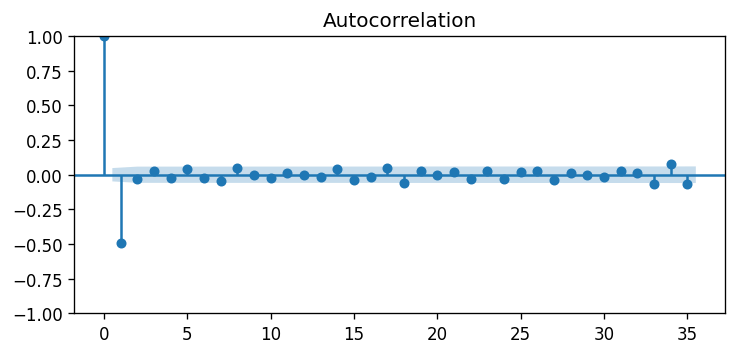

In [56]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(serie['Valor'].diff().dropna(), ax=ax, lags=35)
plt.show()

En este caso es un punto. q=1

### Orden del término AR "p"
El orden p es el numero de puntos que sobresalen en el gráfico de Autocorrelación parcial (excluyendo el 0)

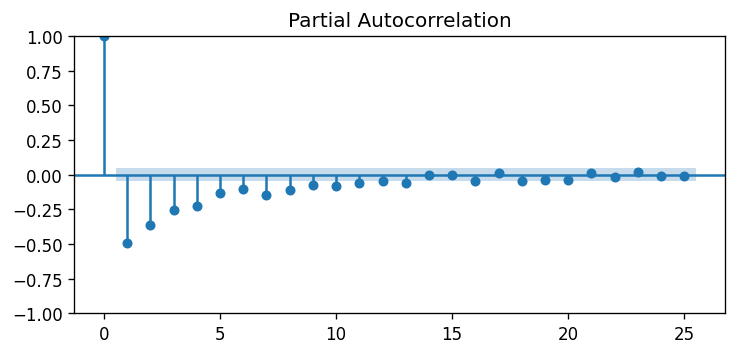

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(serie["Valor"].diff().dropna(), ax=ax, lags=25)
plt.show()

En este caso son 5 puntos

## Construcción del modelo ARIMA
order=(p,d,q)

In [58]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(serie["Valor"], order=(6,1,1))
model_fit1 = model_1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                 1659
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -5144.103
Date:                Sun, 17 Dec 2023   AIC                          10304.206
Time:                        20:41:34   BIC                          10347.513
Sample:                    01-01-2020   HQIC                         10320.259
                         - 07-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0969      0.044     -2.194      0.028      -0.183      -0.010
ar.L2         -0.1030      0.042     -2.448      0.014      -0.185      -0.021
ar.L3         -0.0419      0.039     -1.066      0.2

## Test de Ljung_Box

$H_0$: Los datos se distribuyen de forma independiente (es decir, las correlaciones en la población de la que se toma la muestra son 0, de modo que cualquier correlación observada en los datos es el resultado de la aleatoriedad del proceso de muestreo).

$H_a$: Los datos no se distribuyen de forma independiente.

In [59]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(model_fit1.resid, lags=None, boxpierce=False, model_df=0, period=None, return_df=True, auto_lag=False)

,lb_stat,lb_pvalue
1,0.574896,0.448320
2,0.640479,0.725975
3,1.062772,0.786068
4,1.298275,0.861668
5,1.418872,0.922238
6,2.092121,0.911034
7,5.499850,0.599202
8,5.727123,0.677767
9,5.875054,0.752355
10,5.904102,0.823255


Los datos son independientes, es decir, el modelo funciona correctamente

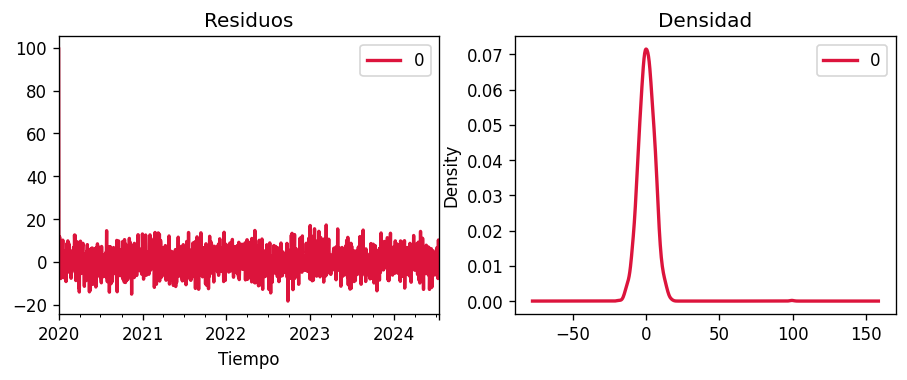

In [60]:
plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi':120})

#Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax =plt.subplots(1,2)
residuals.plot(title="Residuos", ax=ax[0], color="crimson", lw=2)
residuals.plot(kind='kde', title='Densidad', ax=ax[1], color="crimson", lw=2)
plt.show()

Los residuos (errores), se distribuyen de forma normal en torno al 0

# Gráfico de la predicción final

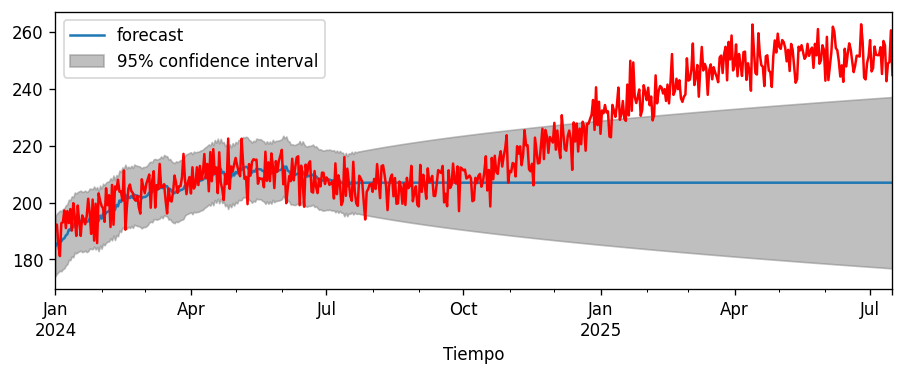

In [61]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit1, '2024-01-01', '2025-07-16')
serie_copia['2024-01-01':'2025-07-16']["Valor"].plot(color="r")

plt.show()

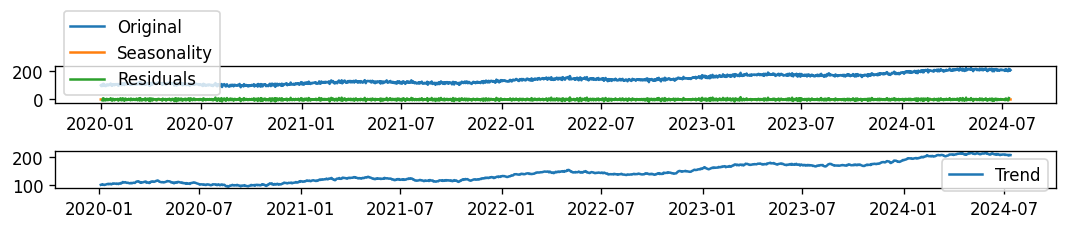

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(serie["Valor"])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(serie["Valor"], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)